In [1]:
# Installing the packages that will be used. The "!" on the commands it's for use in the OS, out of Jupyter.
# This is for use SQLite
!pip install -q imdb-sqlite
# This is for use the countries name and abbreviations
!pip install -q pycountry

In [2]:
# Importing the necessary packages and ignoring some warnings
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "whitegrid")

In [4]:
# Jupyter command for see the execution time
%time
# Download data from IMDB
!imdb-sqlite

Wall time: 0 ns


2021-09-05 10:54:02,279 DB already exists: (imdb.db). Refusing to modify. Exiting


In [5]:
# Connecting to database
conn = sqlite3.connect("imdb.db")
# Makes a table list
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)
# Show the result
tabelas.head()

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [6]:
# Converting dataframe to a list
tabelas = tabelas["Table_Name"].values.tolist()
# Extracting the list
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




### Most common movies category

In [7]:
# Makes a SQL consult
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''
# Results
resultado1 = pd.read_sql_query(consulta1, conn)
# Show the result
display(resultado1)

,type,COUNT
0,movie,586428
1,radioEpisode,1
2,radioSeries,1
3,short,828461
4,tvEpisode,6027449
5,tvMiniSeries,39532
6,tvMovie,132765
7,tvPilot,1
8,tvSeries,213736
9,tvShort,10247


In [8]:
# Percentage for each type
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100
# Show the result
display(resultado1)

,type,COUNT,percentual
0,movie,586428,7.132905
1,radioEpisode,1,0.000012
2,radioSeries,1,0.000012
3,short,828461,10.076827
4,tvEpisode,6027449,73.313724
5,tvMiniSeries,39532,0.480840
6,tvMovie,132765,1.614862
7,tvPilot,1,0.000012
8,tvSeries,213736,2.599737
9,tvShort,10247,0.124637


In [9]:
# Choosing only the top 3 categories and sum all the rest
# Empty dictionary
others = {}
# Filtering the percentage
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()
# The rest
others['type'] = 'others'
# Show the result
display(others)

{'COUNT': 779109, 'percentual': 9.476543484376897, 'type': 'others'}

In [27]:
# Filtering
resultado1 = resultado1[resultado1['percentual'] > 5]
# Append all categorys in a dataframe
resultado1 = resultado1.append(others, ignore_index = True)
# Ordering the result
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)
# Ajusting
resultado1 = resultado1.drop_duplicates()
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]
# Show the result
resultado1.head(15)

,type,COUNT,percentual
0,tvEpisode,6027449,73.313724
1,short,828461,10.076827
2,others,779109,9.476543
12,movie,586428,7.132905


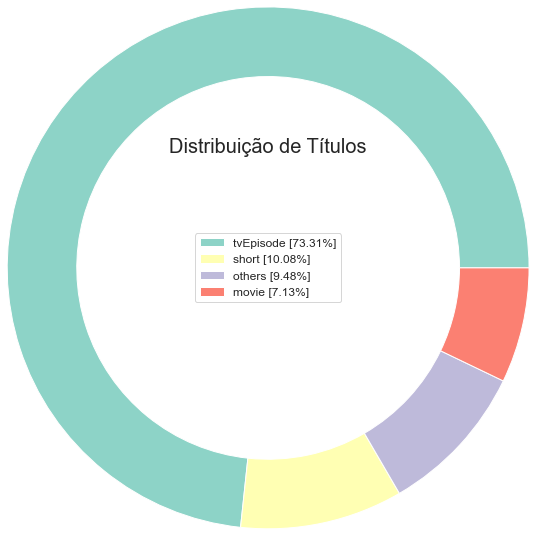

In [28]:
# Plot
cs = cm.Set3(np.arange(100))
f = plt.figure()
# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

### How Many Titles By Gender

In [29]:
# Makes a SQL consult
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres'''
# Results
resultado2 = pd.read_sql_query(consulta2, conn)
# Show the result
display(resultado2)

,genres,COUNT(*)
0,Action,13366
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1441,"Thriller,Western",39
1442,War,1252
1443,"War,Western",9
1444,Western,4010


In [32]:
# Converting to low case
resultado2['genres'] = resultado2['genres'].str.lower().values
# Remove nulll values
temp = resultado2['genres'].dropna()
# Vector to filter strings
vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
# Vetorization 
bag_generos = vetor.transform(temp)
# Unique genres
generos_unicos =  vetor.get_feature_names()
# Creating a genre dataframe
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)
# Drop n column
generos = generos.drop(columns = 'n', axis = 0)
# Show the result
generos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1446 non-null   int64
 1   adult        1446 non-null   int64
 2   adventure    1446 non-null   int64
 3   animation    1446 non-null   int64
 4   biography    1446 non-null   int64
 5   comedy       1446 non-null   int64
 6   crime        1446 non-null   int64
 7   documentary  1446 non-null   int64
 8   drama        1446 non-null   int64
 9   family       1446 non-null   int64
 10  fantasy      1446 non-null   int64
 11  film-noir    1446 non-null   int64
 12  game-show    1446 non-null   int64
 13  history      1446 non-null   int64
 14  horror       1446 non-null   int64
 15  music        1446 non-null   int64
 16  musical      1446 non-null   int64
 17  mystery      1446 non-null   int64
 18  news         1446 non-null   int64
 19  reality-tv   1446 non-null   int64
 20  romance 

In [33]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]
# Show the result
generos_percentual.head(10)

drama          18.395574
comedy         16.943292
documentary    15.975104
adventure      14.868603
action         14.591978
romance        13.485477
crime          13.001383
mystery        12.586445
thriller       12.378976
fantasy        12.240664
dtype: float64

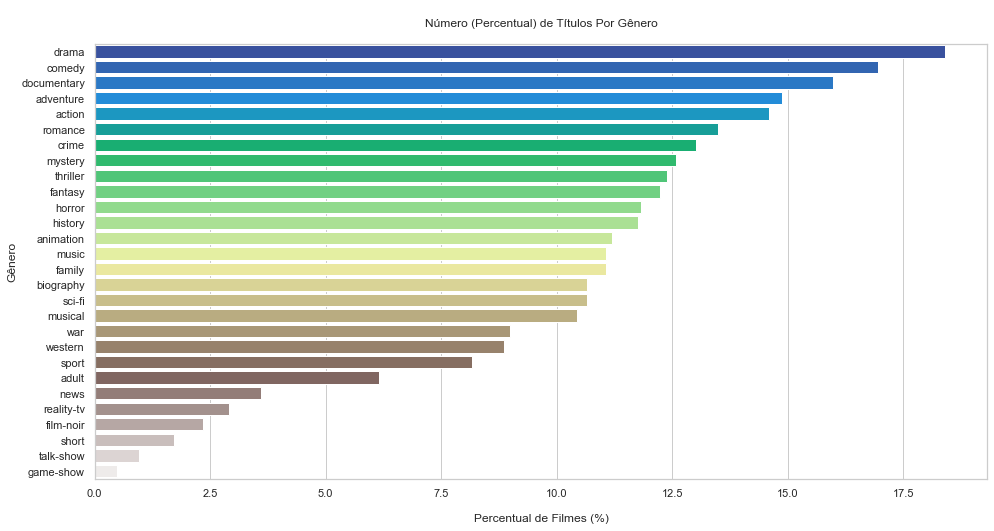

In [35]:
# Plot
plt.figure(figsize = (16,8))
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
plt.ylabel('Gênero')             
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

### What is the Median Rating of Films by Gender

In [36]:
# Makes a SQL consult
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            '''
# Result
resultado3 = pd.read_sql_query(consulta3, conn)
# Show the result
display(resultado3)

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
267757,3.5,"Action,Adventure,Thriller"
267758,5.8,Thriller
267759,6.3,"Adventure,Drama,History"
267760,3.8,"Adventure,History,War"


In [38]:
# Creating a function to return the genres
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos

In [39]:
# Applying the function
generos_unicos = retorna_generos(resultado3)
# Show the result
display(generos_unicos)

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [40]:
# Creating empty lists
genero_counts = []
genero_ratings = []
# Loop
for item in generos_unicos:
    # Count of movies by genre
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
     # Avaliation of movies by genre
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

In [41]:
# Final dataframe
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos
df_genero_ratings['count'] = genero_counts
df_genero_ratings['rating'] = genero_ratings
# Drop of 18 rate
df_genero_ratings = df_genero_ratings.drop(index = 18)
# Order
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)
# Show the result
df_genero_ratings.head(20)

,genres,count,rating
7,documentary,39230,7.30
22,short,19,7.20
12,game-show,3,7.20
4,biography,8052,7.00
13,history,7362,6.90
24,talk-show,10,6.75
23,sport,3163,6.70
26,war,5799,6.60
11,film-noir,760,6.60
15,music,12347,6.60


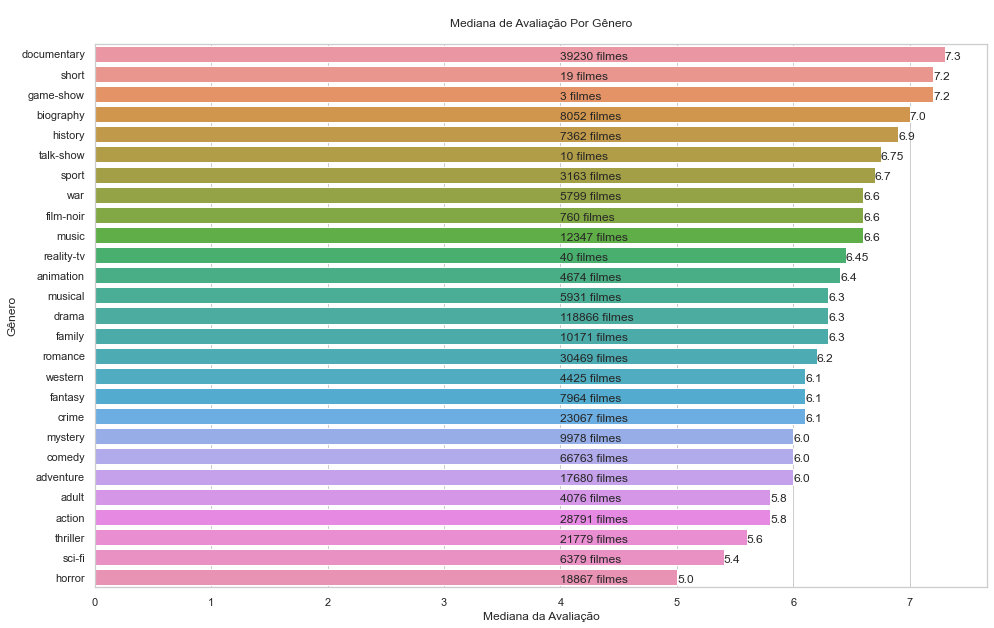

In [42]:
# Plot

# Figura
plt.figure(figsize = (16,10))

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")

# Textos do gráfico
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

### What is the Median Rating of Films Relative to the Year of Release